**Linear Regression**

In [ ]:
#sklearn implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#generate some dataset
np.random.seed(0)
x = np.random.rand(100,1)
y = 2 + 3*x + np.random.rand(100,1)

In [ ]:
#Model inizialization
regression_model = LinearRegression()
#fit x, y to the model---> training
regression_model.fit(x,y)
#predict
y_predicted = regression_model.predict(x)

In [ ]:
#model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

#printing values
print('Slope: ', regression_model.coef_)
print('Intercept: ', regression_model.intercept_ )
print('RMSE: ', rmse)
print('R2: ', r2)

Slope:  [[2.93655106]]
Intercept:  [2.55808002]
RMSE:  0.07623324582875007
R2:  0.9038655568672764


In [ ]:
# Manual python implementation of linear reg
n = 100
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

x_train = x
y_train = y

epochs = 0
while (epochs<1000):
  y = a_0 + a_1*x_train
  error = y - y_train
  mean_sq_error = np.sum(error**2)
  mean_sq_error = mean_sq_error/n

  a_0 = a_0 - alpha*2*np.sum(error)/n
  a_1 = a_1 - alpha*2*np.sum(error*x_train)/n

  epochs +=1

y_prediction = a_0 + a_1*x
print('R2 Score: ', r2_score(y, y_prediction))


R2 Score:  0.9999432210191253


**Logistic regression**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/day6_dataset/User_Data.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x = dataset.iloc[:, [2,3]].values

y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=0)


In [ ]:
x_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

print(x_train[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


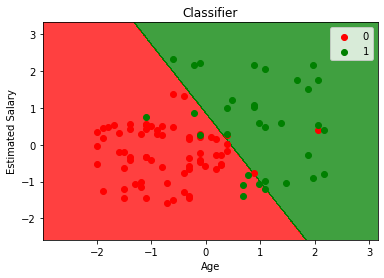

In [ ]:
#plot descision boundary
from matplotlib.colors import ListedColormap
x_set , y_set = x_test, y_test

x1 , x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, 
                                stop = x_set[:,0].max()+1, step =0.01),
                      np.arange(start=x_set[:, 1].min()-1, 
                                stop = x_set[:,1].max()+1, step =0.01))

plt.contourf(x1, x2, classifier.predict(
    np.array([x1.ravel(), x2.ravel()]).T).reshape(
        x1.shape), alpha =0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)


plt.title('Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()